In [ ]:
import pandas as pd
import numpy as np

In [ ]:

import tensorflow as tf

# helps in text preprocessing

tf.config.run_functions_eagerly(True)
from tensorflow import keras
from keras.preprocessing import text, sequence
from keras import utils

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

# helps in model building
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Embedding
from tensorflow.keras.callbacks import EarlyStopping

import nltk
!pip install nltk
nltk.download('punkt')

from nltk.corpus import stopwords

nltk.download('stopwords')
import string
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# split data into train and test set
from sklearn.model_selection import train_test_split



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
true_df = pd.read_csv("True.csv")
false_df = pd.read_csv("Fake.csv")

In [ ]:
true_df

,title,subject
0,U.S. bill to regulate internet ads gains bipar...,politicsNews
1,Republican Senator Hatch rejects bipartisan he...,politicsNews
2,Trump to announce Fed chair decision in 'comin...,politicsNews
3,Trump does not support Alexander-Murray health...,politicsNews
4,Pentagon chief asks Congress to not hinder cyb...,politicsNews
...,...,...
10596,'Fully committed' NATO backs new U.S. approach...,worldnews
10597,LexisNexis withdrew two products from Chinese ...,worldnews
10598,Minsk cultural hub becomes haven from authorities,worldnews
10599,Vatican upbeat on possibility of Pope Francis ...,worldnews


In [ ]:
false_df

,title,subject
0,The Leaker-In-Chief Just Tweeted Classified I...,News
1,Senator Who Has Accomplished Nothing Is Very ...,News
2,Breaking: MAJOR Action Taking Place At Trump ...,News
3,Three Days Before Trump Calls For More Police...,News
4,Official GOP Twitter Account Went Fully Delus...,News
...,...,...
18301,McPain: John McCain Furious That Iran Treated ...,MiddleEast
18302,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,MiddleEast
18303,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,MiddleEast
18304,How to Blow $700 Million: Al Jazeera America F...,MiddleEast


In [ ]:
true_df['class'] = 1
false_df['class'] = 0

In [ ]:
true_df

,title,subject,class
0,U.S. bill to regulate internet ads gains bipar...,politicsNews,1
1,Republican Senator Hatch rejects bipartisan he...,politicsNews,1
2,Trump to announce Fed chair decision in 'comin...,politicsNews,1
3,Trump does not support Alexander-Murray health...,politicsNews,1
4,Pentagon chief asks Congress to not hinder cyb...,politicsNews,1
...,...,...,...
10596,'Fully committed' NATO backs new U.S. approach...,worldnews,1
10597,LexisNexis withdrew two products from Chinese ...,worldnews,1
10598,Minsk cultural hub becomes haven from authorities,worldnews,1
10599,Vatican upbeat on possibility of Pope Francis ...,worldnews,1


In [ ]:
false_df

,title,subject,class
0,The Leaker-In-Chief Just Tweeted Classified I...,News,0
1,Senator Who Has Accomplished Nothing Is Very ...,News,0
2,Breaking: MAJOR Action Taking Place At Trump ...,News,0
3,Three Days Before Trump Calls For More Police...,News,0
4,Official GOP Twitter Account Went Fully Delus...,News,0
...,...,...,...
18301,McPain: John McCain Furious That Iran Treated ...,MiddleEast,0
18302,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,MiddleEast,0
18303,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,MiddleEast,0
18304,How to Blow $700 Million: Al Jazeera America F...,MiddleEast,0


In [ ]:
news_df = pd.concat([true_df,false_df])


In [ ]:
news_df

,title,subject,class
0,U.S. bill to regulate internet ads gains bipar...,politicsNews,1
1,Republican Senator Hatch rejects bipartisan he...,politicsNews,1
2,Trump to announce Fed chair decision in 'comin...,politicsNews,1
3,Trump does not support Alexander-Murray health...,politicsNews,1
4,Pentagon chief asks Congress to not hinder cyb...,politicsNews,1
...,...,...,...
18301,McPain: John McCain Furious That Iran Treated ...,MiddleEast,0
18302,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,MiddleEast,0
18303,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,MiddleEast,0
18304,How to Blow $700 Million: Al Jazeera America F...,MiddleEast,0


In [ ]:
news_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 28907 entries, 0 to 18305
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    28907 non-null  object
 1   subject  28907 non-null  object
 2   class    28907 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 903.3+ KB


In [ ]:
news_df.isnull().sum()

title      0
subject    0
class      0
dtype: int64

In [ ]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(word=i))


    return " ".join(y)

In [ ]:
news_df['subject'].value_counts()


politicsNews       9208
News               8084
politics           4504
LeftNews           2910
Government News    1570
worldnews          1393
MiddleEast          711
USNews              527
Name: subject, dtype: int64

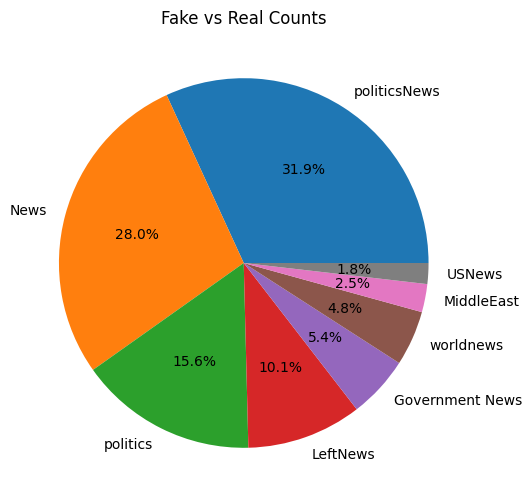

In [ ]:
import matplotlib.pyplot as plt

fake_true_counts = news_df['subject'].value_counts().rename_axis('subject').to_frame('counts').reset_index()
fake_true_counts['subject'] = fake_true_counts['subject'].replace({1: 'Fake', 0: 'True'})

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie plot of the counts
ax = plt.pie(fake_true_counts['counts'], labels=fake_true_counts['subject'], autopct='%1.1f%%')
plt.title('Fake vs Real Counts')

# Show the plot
plt.show()


In [ ]:
news_df

,title,subject,class
0,U.S. bill to regulate internet ads gains bipar...,politicsNews,1
1,Republican Senator Hatch rejects bipartisan he...,politicsNews,1
2,Trump to announce Fed chair decision in 'comin...,politicsNews,1
3,Trump does not support Alexander-Murray health...,politicsNews,1
4,Pentagon chief asks Congress to not hinder cyb...,politicsNews,1
...,...,...,...
18301,McPain: John McCain Furious That Iran Treated ...,MiddleEast,0
18302,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,MiddleEast,0
18303,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,MiddleEast,0
18304,How to Blow $700 Million: Al Jazeera America F...,MiddleEast,0


In [ ]:
news_df['title_lower']=news_df['title'].apply(transform_text)
news_df['subject_lower']=news_df['subject'].apply(transform_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
#creating vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2),max_features=2000)

In [ ]:
X = news_df[['title',"subject"]].values
y = news_df['class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade keras


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 34.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.8 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assuming X_train and X_test are NumPy arrays of strings
X_train_list = X_train.astype(str).tolist()
X_test_list = X_test.astype(str).tolist()

# Create a tokenizer and fit on the texts
t = Tokenizer()
t.fit_on_texts(X_train_list)

# Convert the text sequences to numerical sequences
encoded_train = t.texts_to_sequences(X_train_list)
encoded_test = t.texts_to_sequences(X_test_list)

# Pad the sequences to make them of equal length
max_sequence_length = max(len(seq) for seq in encoded_train)
encoded_train_padded = pad_sequences(encoded_train, maxlen=max_sequence_length, padding='post')
encoded_test_padded = pad_sequences(encoded_test, maxlen=max_sequence_length, padding='post')

In [ ]:
max_length = 8
padded_train = pad_sequences(encoded_train, maxlen=max_length, padding='post')
padded_test = pad_sequences(encoded_test, maxlen=max_length, padding='post')
print(padded_train)

[[ 1905     2     0 ...     0     0     0]
 [ 1906     4     0 ...     0     0     0]
 [ 1907     1     0 ...     0     0     0]
 ...
 [21086     1     0 ...     0     0     0]
 [21087     2     0 ...     0     0     0]
 [21088     5     0 ...     0     0     0]]


In [ ]:
### Will calculate vocabulary size , no of unique tokens(words/sentences) I have in my data
vocab_size = len(t.word_index) + 1
## Will be used as input_dim for Embeddings

In [ ]:
# define the model
model = Sequential()
model.add(Embedding(vocab_size, 24, input_length=max_length))

## Why embedding ? To add contextual vectorizartion to inputs i.e each input will be represented as a dim vector of size
### input_dim :- Unique tokens in vocabulary
### output dim :- 24 (Each word will be represented in 24 *1 vector)
model.add(SimpleRNN(24, return_sequences=False))
## As each input is converted into embedding of 24 tokens , input for simple RNN is 24)
model.add(Dense(1, activation='sigmoid'))

# compile the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

# summarize the model
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 8, 24)             506136    
                                                                 
 simple_rnn (SimpleRNN)      (None, 24)                1176      
                                                                 
 dense (Dense)               (None, 1)                 25        
                                                                 
Total params: 507,337
Trainable params: 507,337
Non-trainable params: 0
_________________________________________________________________
None


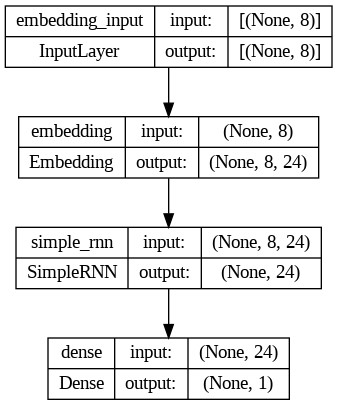

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='model_1.png', show_shapes=True, show_layer_names=True)

In [ ]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

## Early stop will help us prevent early stopping , it will monitor Validation loss with patience =10
## Interpretation :-
# monitor: Specifies the quantity to monitor during training. In this case, 'val_loss' is used, indicating that the validation loss will be monitored.
# mode: Specifies the direction of improvement to consider as an improvement. The 'min' mode is used here, meaning that the validation loss should decrease to be considered an improvement. If you were using a different metric, such as accuracy, you might use 'max' mode.
# verbose: Controls the verbosity mode. Setting it to 1 means that a message will be printed to the console when the callback is triggered.
# patience: Specifies the number of epochs to wait for improvement in the monitored quantity before stopping the training. In this case, if the validation loss does not improve for 10 consecutive epochs, the training will stop.

# fit the model
model.fit(x=padded_train,
         y=y_train,
         epochs=100,
         validation_data=(padded_test, y_test), verbose=1,
         callbacks=[early_stop]
         )

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  


723/723 [==============================] - 46s 63ms/step - loss: 0.0185 - accuracy: 0.9951 - val_loss: 0.4970 - val_accuracy: 0.6430
Epoch 2/100
723/723 [==============================] - 32s 44ms/step - loss: 1.6521e-05 - accuracy: 1.0000 - val_loss: 0.4889 - val_accuracy: 0.6430
Epoch 3/100
723/723 [==============================] - 31s 42ms/step - loss: 8.8612e-06 - accuracy: 1.0000 - val_loss: 0.4826 - val_accuracy: 0.6430
Epoch 4/100
723/723 [==============================] - 31s 43ms/step - loss: 6.0759e-06 - accuracy: 1.0000 - val_loss: 0.4778 - val_accuracy: 0.6430
Epoch 5/100
723/723 [==============================] - 29s 40ms/step - loss: 4.6237e-06 - accuracy: 1.0000 - val_loss: 0.4740 - val_accuracy: 0.6430
Epoch 6/100
723/723 [==============================] - 35s 49ms/step - loss: 3.7310e-06 - accuracy: 1.0000 - val_loss: 0.4706 - val_accuracy: 0.6430
Epoch 7/100
723/723 [==============================] - 32s 44ms/step - loss: 3.1265e-06 - accuracy: 1.0000 - val_loss: 0.4

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc

def plot_confusion_matrix(y_true, y_pred):
   mtx = confusion_matrix(y_true, y_pred)
   sns.heatmap(mtx, annot=True, fmt='d', linewidths=.5,
               cmap="Blues", cbar=False)
   plt.ylabel('True label')
   plt.xlabel('Predicted label')


In [ ]:
preds = (model.predict(padded_test) > 0.5).astype("int32")

181/181 [==============================] - 3s 14ms/step


In [ ]:
c_report(y_test, preds)

Classification Report
              precision    recall  f1-score   support

           0       0.64      1.00      0.78      3679
           1       1.00      0.02      0.04      2103

    accuracy                           0.64      5782
   macro avg       0.82      0.51      0.41      5782
weighted avg       0.77      0.64      0.51      5782

Accuracy : 0.6430300933932895


0.6430300933932895

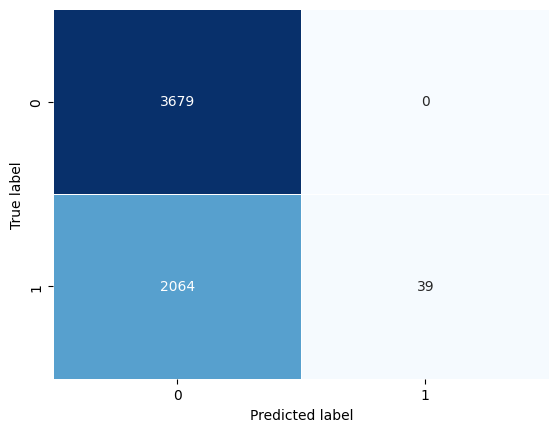

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plot_confusion_matrix(y_test, preds)

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sms = ["Fans line up for Taylor Swift merchandise on the second SoFi tour day"]
sms_proc = t.texts_to_sequences(sms)
sms_proc = pad_sequences(sms_proc, maxlen=max_length, padding='post')
pred = (model.predict(sms_proc)>0.5).astype("int32").item()
print(pred)

1/1 [==============================] - 0s 28ms/step
0


/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  
